<a href="https://colab.research.google.com/github/Rey1380/WavLM/blob/main/wavLM_Large_AGP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WavLM_base

In [12]:
#!pip install  transformers 
#!pip install --quiet datasets
!pip install pycm==3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 2.1 MB/s 
     |████████████████████████████████| 592 kB 7.4 MB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
from transformers import Wav2Vec2FeatureExtractor, WavLMForXVector
import torch
import librosa
import IPython.display as ipd
import numpy as np


In [29]:
import os
spk2spch = {}
PATH = "/content/drive/MyDrive/intern/farsdot_enrollment2/"
for fname in next(os.walk(PATH))[2]:
    spk_id, _ = fname.split("F")
    speech_array, sample_rate = librosa.load(PATH + fname)
    speech_array = speech_array.squeeze().astype(np.float)
    speech_array = librosa.resample(np.array(speech_array), sample_rate, 16000)
    
    spk2spch[f"spk-{spk_id}"] = speech_array
print(spk2spch)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


{'spk-005': array([ 0.00823043,  0.02820847,  0.04818604, ..., -0.14349711,
       -0.14686033, -0.12725166]), 'spk-004': array([-0.02628134, -0.05006496, -0.06950009, ..., -0.12025548,
       -0.16296227, -0.17006206]), 'spk-002': array([ 0.01924788,  0.0242436 ,  0.02184847, ..., -0.10517504,
       -0.10147337, -0.09218591]), 'spk-003': array([-0.05523161, -0.0771074 , -0.06692014, ..., -0.01974893,
       -0.00383414, -0.00249208]), 'spk-001': array([-8.43584842e-02, -1.26433883e-01, -1.48499515e-01, ...,
       -2.05530910e-03, -1.88486905e-03, -1.50226325e-05]), 'spk-019': array([ 0.00022408,  0.00250463,  0.00231654, ..., -0.01310766,
       -0.01753066, -0.03073982]), 'spk-020': array([ 0.02155926,  0.02807357,  0.01591643, ..., -0.00275874,
       -0.0034139 , -0.00528501]), 'spk-021': array([0.01624881, 0.01593339, 0.00991478, ..., 0.01187791, 0.01254094,
       0.01458314]), 'spk-006': array([-0.06826098, -0.01248419,  0.06130153, ...,  0.00544714,
       -0.00366461,  0.008

In [27]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 3.9 MB/s 
     |████████████████████████████████| 212 kB 53.8 MB/s 
     |████████████████████████████████| 141 kB 52.6 MB/s 
     |████████████████████████████████| 115 kB 56.2 MB/s 
     |████████████████████████████████| 127 kB 60.9 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [11]:
from transformers import Wav2Vec2FeatureExtractor, WavLMForXVector
from datasets import load_dataset
import torch
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("/content/drive/MyDrive/intern/wavlm large")
model = WavLMForXVector.from_pretrained("/content/drive/MyDrive/intern/wavlm large")
threshold = 0.9
similarities = []

OSError: ignored

In [31]:
from os.path import exists

with open('/content/drive/MyDrive/intern/farsdot/trials') as f:
    for line in f:
        line = line.strip()
        spk_id, utt_id, target_nontarget = line.split()
        path = "/content/drive/MyDrive/intern/wavlm large/farsdot/"  + utt_id.split("-")[1] + ".wav.wav"
        if exists(path) is False:
            path = "/content/drive/MyDrive/intern/wavlm large/farsdot/"  + utt_id.split("-")[1] + ".WAV.WAV"
        
        speech_array2, sample_rate =librosa.load(path)
        print(path, spk_id, target_nontarget)
        speech_array2 = speech_array2.squeeze().astype(float)
        speech_array2 = librosa.resample(np.array(speech_array2), sample_rate, 16000)
        speech3 = [spk2spch[spk_id], speech_array2]
        
        inputs= feature_extractor(
            speech3,
            sampling_rate=16000,
            return_tensors="pt",
            padding=True)

        with torch.no_grad():
            embeddings = model(**inputs).embeddings

        embeddings = torch.nn.functional.normalize(embeddings, dim=-1).cpu()
        cosine_sim = torch.nn.CosineSimilarity(dim=-1)
        similarity = cosine_sim(embeddings[0], embeddings[1])
        similarities.append(similarity.item())
        print(similarity.item())

/content/drive/MyDrive/intern/wavlm large/farsdot/001F02.WAV.WAV spk-001 target


NameError: ignored

In [ ]:
np.save("similarities.npy", np.array(similarities))

In [ ]:
actual_vector = []
with open('/content/drive/MyDrive/intern/wavlm large/farsdot/trials') as f:
    for line in f:
        line = line.strip()
        spk_id, utt_id, target_nontarget = line.split()
        if target_nontarget == "nontarget":
            actual_vector.append(0)
        else:
            actual_vector.append(1)
actual_vector = np.array(actual_vector)

ROC:

In [ ]:
threshold = 0.957

In [ ]:
similarities = np.array(similarities)
predict_vector = (similarities > threshold) * 1
print(predict_vector)
print(actual_vector)

[1 1 1 ... 1 0 1]
[1 1 1 ... 1 1 1]


In [ ]:
np.save("actual_vector.npy", np.array(actual_vector))

In [ ]:
actual_vector = np.load("actual_vector.npy")
predict_vector = np.load("predict_vector.npy")
similarities = np.load("similarities.npy")

In [ ]:
sum(predict_vector != actual_vector) / len(actual_vector)

0.04765432098765432

In [ ]:
from pycm import ConfusionMatrix
cm = ConfusionMatrix(actual_vector, predict_vector)
cm

pycm.ConfusionMatrix(classes: [0, 1])

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted Classes', ylabel='Actual Classes'>

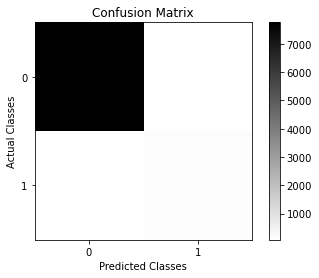

In [ ]:
cm.plot()

In [ ]:
print(cm)

Predict    0          1          
Actual
0          7758       72         

1          78         192        





Overall Statistics : 

95% CI                                                            (0.97855,0.98442)
ACC Macro                                                         0.98148
ARI                                                               0.69549
AUNP                                                              0.85096
AUNU                                                              0.85096
Bangdiwala B                                                      0.9804
Bennett S                                                         0.96296
CBA                                                               0.85058
CSI                                                               0.70962
Chi-Squared                                                       4078.32766
Chi-Squared DF                                                    1
Conditional Entropy                       

In [ ]:
print(cm.overall_stat["F1 Macro"], cm.overall_stat["F1 Micro"])

0.7734150138896176 0.9523456790123457


In [ ]:
for threshold in np.arange(0.94, 0.98, 0.001):
    predict_vector = (similarities > threshold) * 1
    cm = ConfusionMatrix(actual_vector, predict_vector)
    print(threshold, cm.overall_stat["F1 Macro"], cm.overall_stat["F1 Micro"])

0.94 0.81312213233808 0.967037037037037
0.941 0.8178096673339481 0.9683950617283951
0.942 0.8226966166428451 0.97
0.943 0.8223030548472146 0.9704938271604938
0.944 0.8259187620889749 0.971604938271605
0.945 0.8328065375931099 0.9733333333333334
0.946 0.8340170993705176 0.9738271604938271
0.947 0.8368378418866185 0.9745679012345679
0.948 0.8414257038628746 0.975679012345679
0.949 0.8405767994858612 0.9758024691358025
0.95 0.8424131539621054 0.9762962962962963
0.951 0.8472559709849202 0.9774074074074074
0.952 0.8493386071438871 0.9780246913580247
0.953 0.851781685583915 0.9788888888888889
0.954 0.8512755027320804 0.9792592592592593
0.955 0.8523734190648958 0.9801234567901235
0.956 0.8513157130409527 0.9804938271604938
0.957 0.8547631240344438 0.9814814814814815
0.958 0.8489992150706437 0.9812345679012345
0.959 0.8462737503662169 0.981358024691358
0.96 0.8452229299363057 0.9814814814814815
0.961 0.8451486996733274 0.9819753086419754
0.962 0.8449267843695089 0.9823456790123457
0.963 0.8445

In [ ]:
print(speech3)

In [ ]:
inputs= feature_extractor(
  speech3, sampling_rate=16000, return_tensors="pt", padding=True
    )

with torch.no_grad():
    embeddings = model(**inputs).embeddings

embeddings = torch.nn.functional.normalize(embeddings, dim=-1).cpu()

# the resulting embeddings can be used for cosine similarity-based retrieval
cosine_sim = torch.nn.CosineSimilarity(dim=-1)
similarity = cosine_sim(embeddings[0], embeddings[1])
threshold = 0.9  # the optimal threshold is dataset-dependent
if similarity < threshold:
    print("Speakers are not the same!")
round(similarity.item(), 2)

Speakers are not the same!


0.69

In [ ]:
from pycm import *
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import os